In [3]:
import pandas as pd
from datetime import datetime
date_parse= lambda x: datetime.strptime(x, '%Y-%m-%d')

ModuleNotFoundError: No module named 'pandas'

# Table Precipitation Matosinhos With Sliding Media

In [2]:
import pandas as pd
data_precipitation = pd.read_csv('https://api.ipma.pt/open-data/observation/climate/precipitation-total/porto/mrrto-1308-matosinhos.csv', index_col=0, parse_dates=['date'], date_parser=date_parse)
data_precipitation['avg'] = data_precipitation.iloc[:,4].rolling(window=3).mean()
data_precipitation

,minimum,maximum,range,mean,std,avg
date,,,,,,
2021-05-06,1.472929e-06,0.014715,0.014714,0.002409,0.002728,NaN
2021-05-07,5.440877e-08,0.000150,0.000149,0.000044,0.000036,NaN
2021-05-08,1.472929e-06,0.014715,0.014714,0.002409,0.002728,0.001831
2021-05-09,3.250140e+01,44.078968,11.577564,37.863386,4.421180,1.474648
2021-05-10,5.000669e+00,10.037731,5.037062,7.214390,1.755179,2.059696
...,...,...,...,...,...,...
2021-07-29,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000909
2021-07-30,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000909
2021-07-31,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000


## ApplyMap (!Nao aparece a tabela em ficheiro PDF!)

In [3]:
def most_precipt(v, props=''):
    return props if v > 10 else None
data_precipitation.style.applymap(most_precipt,subset='mean',props='color:white;background-color:green')   

,minimum,maximum,range,mean,std,avg
date,,,,,,
2021-05-06 00:00:00,0.000001,0.014715,0.014714,0.002409,0.002728,nan
2021-05-07 00:00:00,0.000000,0.000150,0.000149,0.000044,0.000036,nan
2021-05-08 00:00:00,0.000001,0.014715,0.014714,0.002409,0.002728,0.001831
2021-05-09 00:00:00,32.501404,44.078968,11.577564,37.863386,4.421180,1.474648
2021-05-10 00:00:00,5.000669,10.037731,5.037062,7.214390,1.755179,2.059696
2021-05-11 00:00:00,7.403573,7.910331,0.506758,7.690324,0.139407,2.105255
2021-05-12 00:00:00,2.600381,5.694366,3.093985,4.036201,1.179990,1.024858
2021-05-13 00:00:00,9.700462,13.591835,3.891373,11.478800,1.470744,0.930047
2021-05-14 00:00:00,0.000026,0.199736,0.199709,0.095210,0.077450,0.909395


## Plot Graph

Text(0.5, 0, 'Date')

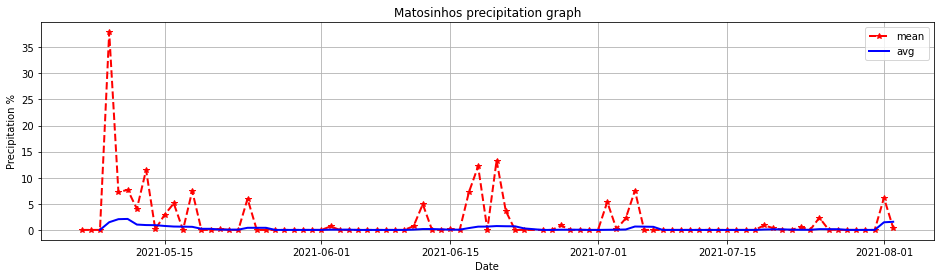

In [4]:
import matplotlib.pyplot as plt

df1 = data_precipitation['mean']
df2 = data_precipitation['avg']
plt.figure(figsize=(16,4))
plt.plot(df1,'r*',linewidth=2, label='mean',linestyle='dashed' )
plt.plot(df2,'b',label='avg', linewidth=2)
plt.legend()
plt.grid()
plt.title('Matosinhos precipitation graph')
plt.ylabel('Precipitation %')
plt.xlabel('Date')


## DateMax

In [5]:
df1.argmax()
var_max_precip = df1.index[df1.argmax()]
df1.argmin()
var_min_precip = df1.index[df1.argmin()]
print(f'The day it rained the most was: {datetime.strftime(var_max_precip,"%Y-%m-%d")}')
print(f'The day it rained the less was: {datetime.strftime(var_min_precip,"%Y-%m-%d")}')

The day it rained the most was: 2021-05-09
The day it rained the less was: 2021-05-17


# Table Maximum Temperature Matosinhos 

In [6]:
import pandas as pd
data_max = pd.read_csv('https://api.ipma.pt/open-data/observation/climate/temperature-max/porto/mtxmx-1308-matosinhos.csv', index_col=0, parse_dates=['date'], date_parser=date_parse)
data_max


,minimum,maximum,range,mean,std
date,,,,,
2021-05-06,19.700172,21.097506,1.397333,20.349553,0.533633
2021-05-07,20.000206,21.597631,1.597425,20.756013,0.615778
2021-05-08,19.700232,21.596319,1.896088,20.575015,0.719963
2021-05-09,17.000183,18.596312,1.596128,17.720027,0.599717
2021-05-10,16.000103,16.897961,0.897858,16.405173,0.338058
...,...,...,...,...,...
2021-07-29,21.800331,24.296658,2.496326,22.991781,0.966465
2021-07-30,21.100353,23.796280,2.695927,22.383009,1.042892
2021-07-31,20.700163,21.898626,1.198463,21.278325,0.466940


## ApplyMap (!Nao aparece a tabela em ficheiro PDF!)

In [7]:
def high_temp(v, props=''):
    return props if v > 20 else None
data_max.style.applymap(high_temp,subset='mean',props='color:white;background-color:blue')   


,minimum,maximum,range,mean,std
date,,,,,
2021-05-06 00:00:00,19.700172,21.097506,1.397333,20.349553,0.533633
2021-05-07 00:00:00,20.000206,21.597631,1.597425,20.756013,0.615778
2021-05-08 00:00:00,19.700232,21.596319,1.896088,20.575015,0.719963
2021-05-09 00:00:00,17.000183,18.596312,1.596128,17.720027,0.599717
2021-05-10 00:00:00,16.000103,16.897961,0.897858,16.405173,0.338058
2021-05-11 00:00:00,16.900242,18.995283,2.095041,17.848406,0.788554
2021-05-12 00:00:00,17.400127,18.497532,1.097404,17.896874,0.413055
2021-05-13 00:00:00,18.000118,18.997932,0.997814,18.456051,0.377761
2021-05-14 00:00:00,17.500284,19.795950,2.295666,18.568572,0.877247


## Plot Graph

Text(0.5, 0, 'Date')

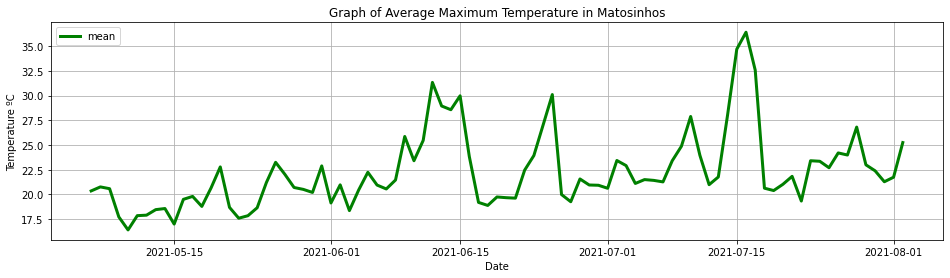

In [8]:
import matplotlib.pyplot as plt
df_max = data_max['mean']
plt.figure(figsize=(16,4))
plt.plot(df_max, 'g', linewidth=3, label='mean')
plt.grid()
plt.legend(loc=2)
plt.title('Graph of Average Maximum Temperature in Matosinhos')
plt.ylabel('Temperature ºC')
plt.xlabel('Date')

## DateMax

In [9]:
max_day=round(max(df_max),2)
df_max.argmax()
var_max = df_max.index[df_max.argmax()]
print(f'The maximum temperature detected was: {max_day}\u2103, in day {datetime.strftime(var_max,"%Y-%m-%d")}')

The maximum temperature detected was: 36.4℃, in day 2021-07-16


# Table Minimum Temperature Matosinhos 

In [10]:
import pandas as pd
data_min = pd.read_csv('https://api.ipma.pt/open-data/observation/climate/temperature-min/porto/mtnmn-1308-matosinhos.csv', index_col=0, parse_dates=['date'], date_parser=date_parse)
data_min

,minimum,maximum,range,mean,std
date,,,,,
2021-05-06,10.001345,10.899882,0.898538,10.474298,0.345873
2021-05-07,10.601243,11.699851,1.098608,11.169582,0.428433
2021-05-08,9.832954,10.599895,0.766941,10.247673,0.280193
2021-05-09,10.103123,11.499837,1.396714,10.866470,0.525748
2021-05-10,7.703108,8.599913,0.896804,8.221621,0.326238
...,...,...,...,...,...
2021-07-29,13.103605,14.099905,0.996300,13.683154,0.360785
2021-07-30,13.200733,13.699934,0.499201,13.462848,0.192199
2021-07-31,13.501393,13.799975,0.298582,13.682755,0.105634


## ApplyMap (!Nao aparece a tabela em ficheiro PDF!)

In [11]:
def low_temp(v, props=''):
    return props if v < 10 else None
data_min.style.applymap(low_temp,subset='mean',props='color:white;background-color:red')   



,minimum,maximum,range,mean,std
date,,,,,
2021-05-06 00:00:00,10.001345,10.899882,0.898538,10.474298,0.345873
2021-05-07 00:00:00,10.601243,11.699851,1.098608,11.169582,0.428433
2021-05-08 00:00:00,9.832954,10.599895,0.766941,10.247673,0.280193
2021-05-09 00:00:00,10.103123,11.499837,1.396714,10.866470,0.525748
2021-05-10 00:00:00,7.703108,8.599913,0.896804,8.221621,0.326238
2021-05-11 00:00:00,7.402050,8.199910,0.797860,7.844536,0.297170
2021-05-12 00:00:00,12.301549,12.999917,0.698368,12.682365,0.262813
2021-05-13 00:00:00,10.502254,11.099944,0.597690,10.852282,0.215641
2021-05-14 00:00:00,8.200760,8.306802,0.106042,8.268029,0.033949


## Plot Graph

Text(0.5, 0, 'Date')

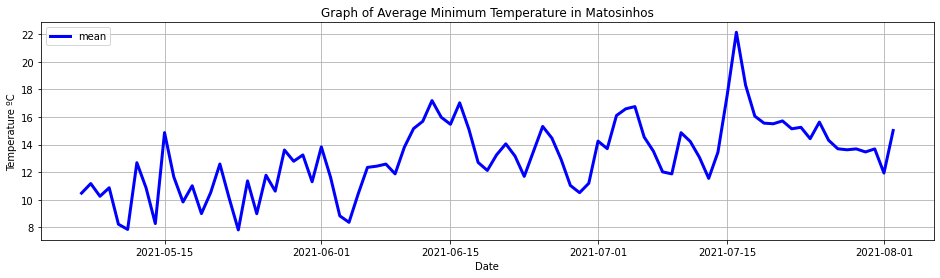

In [12]:
import matplotlib.pyplot as plt
df_min = data_min['mean']
plt.figure(figsize=(16,4))
plt.plot(df_min, 'b',linewidth=3, label='mean')
plt.grid()
plt.legend(loc=2)
plt.title('Graph of Average Minimum Temperature in Matosinhos')
plt.ylabel('Temperature ºC')
plt.xlabel('Date')



## DateMin

In [13]:
min_day=round(min(df_min),2)
df_min.argmin()
var_min = df_min.index[df_min.argmin()]
print(f'The minimum temperature detected was: {min_day}\u2103, in day {datetime.strftime(var_min,"%Y-%m-%d")}')


The minimum temperature detected was: 7.81℃, in day 2021-05-23
